In [30]:
%cd data  
# 환경을 바꾸는 명령어 %

C:\Users\SMHRD\Python\DeepLearning\data


In [2]:
!dir
# 특정명령을 호출하는 !,이건 뒤의 주석도 인식하니 주의할것

 C 드라이브의 볼륨: SYSTEM
 볼륨 일련 번호: ACC9-2BD1

 C:\Users\SMHRD\Python\DeepLearning 디렉터리

2020-09-16  오전 12:22    <DIR>          .
2020-09-16  오전 12:22    <DIR>          ..
2020-09-15  오전 09:18    <DIR>          .ipynb_checkpoints
2020-09-15  오후 12:33            16,952 bestModel.h5
2020-09-09  오후 05:52    <DIR>          data
2020-09-16  오전 12:22           739,636 iris 품종분류 by keras.ipynb
2020-09-10  오후 07:25           457,586 Sequential_Dense.ipynb
2020-09-16  오전 12:22           635,544 XOR문제풀이 by keras.ipynb
2020-09-14  오후 11:21           149,206 폐암데이터 예측하기 by keras.ipynb
               5개 파일           1,998,924 바이트
               4개 디렉터리  340,796,743,680 바이트 남음


In [31]:
%cd ..

C:\Users\SMHRD\Python\DeepLearning


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [5]:
iris = load_iris()

In [6]:
X = iris.data
y = iris.target

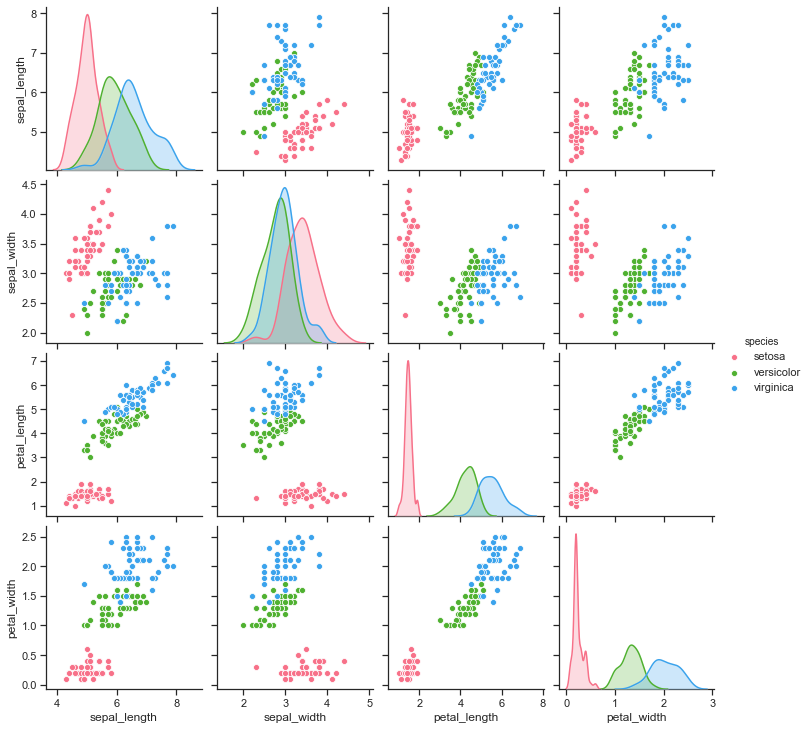

In [7]:
sns.set(style='ticks', color_codes=True)
iris2 = sns.load_dataset('iris')
g = sns.pairplot(iris2, hue='species', palette='husl')

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

- 딥러닝의 결과로 나오는 정답은 나오는 분류에 따라 그 값만 1, 나머지는 0인 원핫인코딩상태로 출력됨
- 정확도 확인을 위해서는 정답지도 원핫인코딩을 하여 나오는 결과값과 맞춰줄 필요가 있음

In [9]:
label_df = pd.DataFrame( y.astype(np.str)) # 기존 정답이 0, 1, 2의 숫자데이터이기에 자르기 위해 문자데이터로 변환
y = pd.get_dummies(label_df)
y.columns = iris.target_names

In [10]:
y

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, shuffle=True, stratify = y)
# 정답이 몰려서 나오지 않도록 정답 비율을 맞춰주는 옵션 stratify

In [12]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 44 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   setosa      105 non-null    uint8
 1   versicolor  105 non-null    uint8
 2   virginica   105 non-null    uint8
dtypes: uint8(3)
memory usage: 1.1 KB


In [13]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 36 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   setosa      45 non-null     uint8
 1   versicolor  45 non-null     uint8
 2   virginica   45 non-null     uint8
dtypes: uint8(3)
memory usage: 495.0 bytes


## 신경망모델 MLP 구성하기
- 출력층의 활성화함수, 퍼셉트론의 갯수
- 손실함수, 옵티바이저
- 평가방법

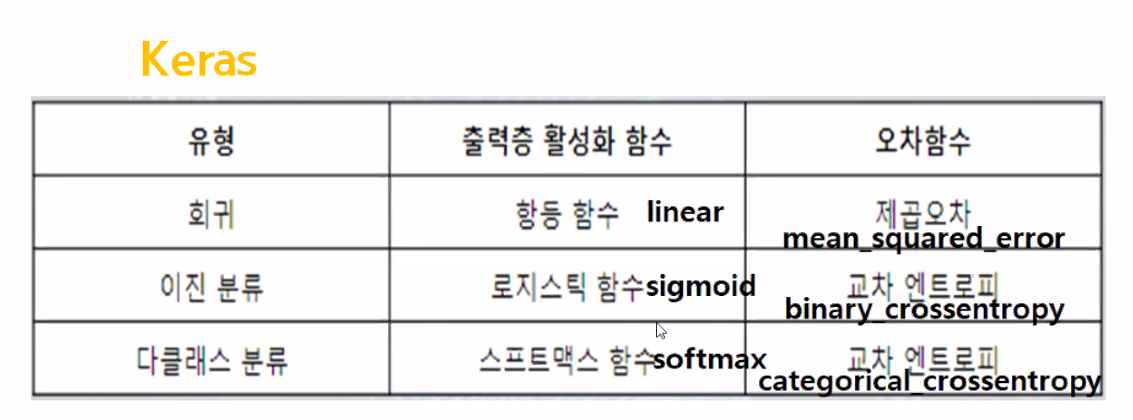

In [14]:
model = Sequential()

model.add( Dense( 8, input_dim=4, activation='sigmoid'))
model.add( Dense( 3, activation='softmax'))  # 평가 후 0 2개와 1 1개 총 3개가 나오니 출력층은 3으로 설정

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',    # 최적화함수 경사하강법 사용
             metrics=['accuracy'])

In [16]:
model.summary()
# param은 4 * 8 + 8 = 40의 형태로 8개의 아웃풋에 각각 wx+b 의 b값이 있어 각 1개씩 8개를 더해주어야한다

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
4/4 [==============================] - 0s 499us/step - loss: 1.1093 - accuracy: 0.3714
Epoch 2/2000
4/4 [==============================] - 0s 499us/step - loss: 1.0973 - accuracy: 0.3619
Epoch 3/2000
4/4 [==============================] - 0s 498us/step - loss: 1.0855 - accuracy: 0.3619
Epoch 4/2000
4/4 [==============================] - 0s 499us/step - loss: 1.0745 - accuracy: 0.3714
Epoch 5/2000
4/4 [==============================] - 0s 507us/step - loss: 1.0617 - accuracy: 0.3714
Epoch 6/2000
4/4 [==============================] - 0s 499us/step - loss: 1.0520 - accuracy: 0.3619
Epoch 7/2000
4/4 [==============================] - 0s 748us/step - loss: 1.0420 - accuracy: 0.3714
Epoch 8/2000
4/4 [==============================] - 0s 499us/step - loss: 1.0332 - accuracy: 0.3714
Epoch 9/2000
4/4 [==============================] - 0s 748us/step - loss: 1.0247 - accuracy: 0.3714
Epoch 10/2000
4/4 [==============================] - 0s 501us/step - loss: 1.0171 - accuracy: 0.3905

4/4 [==============================] - 0s 499us/step - loss: 0.7857 - accuracy: 0.7333
Epoch 83/2000
4/4 [==============================] - 0s 250us/step - loss: 0.7839 - accuracy: 0.7238
Epoch 84/2000
4/4 [==============================] - 0s 748us/step - loss: 0.7818 - accuracy: 0.7143
Epoch 85/2000
4/4 [==============================] - 0s 249us/step - loss: 0.7799 - accuracy: 0.7143
Epoch 86/2000
4/4 [==============================] - 0s 748us/step - loss: 0.7780 - accuracy: 0.7333
Epoch 87/2000
4/4 [==============================] - 0s 499us/step - loss: 0.7761 - accuracy: 0.7619
Epoch 88/2000
4/4 [==============================] - 0s 499us/step - loss: 0.7743 - accuracy: 0.7238
Epoch 89/2000
4/4 [==============================] - 0s 499us/step - loss: 0.7724 - accuracy: 0.7143
Epoch 90/2000
4/4 [==============================] - 0s 499us/step - loss: 0.7703 - accuracy: 0.7143
Epoch 91/2000
4/4 [==============================] - 0s 499us/step - loss: 0.7685 - accuracy: 0.7143
Epoc

4/4 [==============================] - 0s 505us/step - loss: 0.6568 - accuracy: 0.8381
Epoch 163/2000
4/4 [==============================] - 0s 499us/step - loss: 0.6558 - accuracy: 0.8381
Epoch 164/2000
4/4 [==============================] - 0s 499us/step - loss: 0.6541 - accuracy: 0.8381
Epoch 165/2000
4/4 [==============================] - 0s 505us/step - loss: 0.6534 - accuracy: 0.8381
Epoch 166/2000
4/4 [==============================] - 0s 499us/step - loss: 0.6517 - accuracy: 0.8000
Epoch 167/2000
4/4 [==============================] - 0s 499us/step - loss: 0.6505 - accuracy: 0.8000
Epoch 168/2000
4/4 [==============================] - 0s 748us/step - loss: 0.6495 - accuracy: 0.8190
Epoch 169/2000
4/4 [==============================] - 0s 499us/step - loss: 0.6482 - accuracy: 0.7810
Epoch 170/2000
4/4 [==============================] - 0s 506us/step - loss: 0.6467 - accuracy: 0.8095
Epoch 171/2000
4/4 [==============================] - 0s 492us/step - loss: 0.6456 - accuracy: 0.

4/4 [==============================] - 0s 504us/step - loss: 0.5730 - accuracy: 0.8571
Epoch 243/2000
4/4 [==============================] - 0s 505us/step - loss: 0.5721 - accuracy: 0.8571
Epoch 244/2000
4/4 [==============================] - 0s 503us/step - loss: 0.5712 - accuracy: 0.8571
Epoch 245/2000
4/4 [==============================] - 0s 499us/step - loss: 0.5704 - accuracy: 0.8571
Epoch 246/2000
4/4 [==============================] - 0s 249us/step - loss: 0.5695 - accuracy: 0.8571
Epoch 247/2000
4/4 [==============================] - 0s 499us/step - loss: 0.5689 - accuracy: 0.8571
Epoch 248/2000
4/4 [==============================] - 0s 499us/step - loss: 0.5681 - accuracy: 0.8571
Epoch 249/2000
4/4 [==============================] - 0s 499us/step - loss: 0.5674 - accuracy: 0.8571
Epoch 250/2000
4/4 [==============================] - 0s 499us/step - loss: 0.5666 - accuracy: 0.8381
Epoch 251/2000
4/4 [==============================] - 0s 499us/step - loss: 0.5656 - accuracy: 0.

4/4 [==============================] - 0s 499us/step - loss: 0.5180 - accuracy: 0.9524
Epoch 323/2000
4/4 [==============================] - 0s 499us/step - loss: 0.5173 - accuracy: 0.9619
Epoch 324/2000
4/4 [==============================] - 0s 492us/step - loss: 0.5168 - accuracy: 0.9524
Epoch 325/2000
4/4 [==============================] - 0s 499us/step - loss: 0.5160 - accuracy: 0.9524
Epoch 326/2000
4/4 [==============================] - 0s 499us/step - loss: 0.5155 - accuracy: 0.9619
Epoch 327/2000
4/4 [==============================] - 0s 499us/step - loss: 0.5153 - accuracy: 0.9238
Epoch 328/2000
4/4 [==============================] - 0s 506us/step - loss: 0.5144 - accuracy: 0.9524
Epoch 329/2000
4/4 [==============================] - 0s 748us/step - loss: 0.5141 - accuracy: 0.9143
Epoch 330/2000
4/4 [==============================] - 0s 748us/step - loss: 0.5133 - accuracy: 0.9238
Epoch 331/2000
4/4 [==============================] - 0s 492us/step - loss: 0.5128 - accuracy: 0.

4/4 [==============================] - 0s 498us/step - loss: 0.4794 - accuracy: 0.9524
Epoch 403/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4779 - accuracy: 0.9619
Epoch 404/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4776 - accuracy: 0.9619
Epoch 405/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4772 - accuracy: 0.9619
Epoch 406/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4768 - accuracy: 0.9619
Epoch 407/2000
4/4 [==============================] - 0s 493us/step - loss: 0.4763 - accuracy: 0.9619
Epoch 408/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4761 - accuracy: 0.9619
Epoch 409/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4753 - accuracy: 0.9619
Epoch 410/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4749 - accuracy: 0.9619
Epoch 411/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4750 - accuracy: 0.

4/4 [==============================] - 0s 499us/step - loss: 0.4472 - accuracy: 0.9524
Epoch 483/2000
4/4 [==============================] - 0s 249us/step - loss: 0.4468 - accuracy: 0.9619
Epoch 484/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4466 - accuracy: 0.9619
Epoch 485/2000
4/4 [==============================] - 0s 748us/step - loss: 0.4462 - accuracy: 0.9524
Epoch 486/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4457 - accuracy: 0.9619
Epoch 487/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4454 - accuracy: 0.9619
Epoch 488/2000
4/4 [==============================] - 0s 506us/step - loss: 0.4450 - accuracy: 0.9619
Epoch 489/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4446 - accuracy: 0.9619
Epoch 490/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4442 - accuracy: 0.9619
Epoch 491/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4443 - accuracy: 0.

4/4 [==============================] - 0s 499us/step - loss: 0.4200 - accuracy: 0.9619
Epoch 563/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4196 - accuracy: 0.9714
Epoch 564/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4193 - accuracy: 0.9619
Epoch 565/2000
4/4 [==============================] - 0s 249us/step - loss: 0.4194 - accuracy: 0.9619
Epoch 566/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4187 - accuracy: 0.9714
Epoch 567/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4186 - accuracy: 0.9714
Epoch 568/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4182 - accuracy: 0.9714
Epoch 569/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4181 - accuracy: 0.9810
Epoch 570/2000
4/4 [==============================] - 0s 748us/step - loss: 0.4177 - accuracy: 0.9714
Epoch 571/2000
4/4 [==============================] - 0s 499us/step - loss: 0.4170 - accuracy: 0.

4/4 [==============================] - 0s 498us/step - loss: 0.3956 - accuracy: 0.9714
Epoch 643/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3956 - accuracy: 0.9714
Epoch 644/2000
4/4 [==============================] - 0s 492us/step - loss: 0.3954 - accuracy: 0.9714
Epoch 645/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3949 - accuracy: 0.9714
Epoch 646/2000
4/4 [==============================] - 0s 498us/step - loss: 0.3943 - accuracy: 0.9714
Epoch 647/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3941 - accuracy: 0.9714
Epoch 648/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3943 - accuracy: 0.9619
Epoch 649/2000
4/4 [==============================] - 0s 504us/step - loss: 0.3934 - accuracy: 0.9714
Epoch 650/2000
4/4 [==============================] - 0s 492us/step - loss: 0.3930 - accuracy: 0.9714
Epoch 651/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3934 - accuracy: 0.

4/4 [==============================] - 0s 249us/step - loss: 0.3725 - accuracy: 0.9714
Epoch 723/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3723 - accuracy: 0.9714
Epoch 724/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3720 - accuracy: 0.9714
Epoch 725/2000
4/4 [==============================] - 0s 249us/step - loss: 0.3722 - accuracy: 0.9714
Epoch 726/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3718 - accuracy: 0.9714
Epoch 727/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3713 - accuracy: 0.9619
Epoch 728/2000
4/4 [==============================] - 0s 502us/step - loss: 0.3709 - accuracy: 0.9714
Epoch 729/2000
4/4 [==============================] - 0s 506us/step - loss: 0.3710 - accuracy: 0.9714
Epoch 730/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3708 - accuracy: 0.9714
Epoch 731/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3705 - accuracy: 0.

4/4 [==============================] - 0s 499us/step - loss: 0.3514 - accuracy: 0.9714
Epoch 803/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3517 - accuracy: 0.9714
Epoch 804/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3512 - accuracy: 0.9714
Epoch 805/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3518 - accuracy: 0.9714
Epoch 806/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3508 - accuracy: 0.9714
Epoch 807/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3511 - accuracy: 0.9619
Epoch 808/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3508 - accuracy: 0.9619
Epoch 809/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3507 - accuracy: 0.9619
Epoch 810/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3499 - accuracy: 0.9714
Epoch 811/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3490 - accuracy: 0.

4/4 [==============================] - 0s 499us/step - loss: 0.3314 - accuracy: 0.9714
Epoch 883/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3313 - accuracy: 0.9714
Epoch 884/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3312 - accuracy: 0.9714
Epoch 885/2000
4/4 [==============================] - 0s 505us/step - loss: 0.3317 - accuracy: 0.9714
Epoch 886/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3308 - accuracy: 0.9714
Epoch 887/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3304 - accuracy: 0.9810
Epoch 888/2000
4/4 [==============================] - 0s 498us/step - loss: 0.3306 - accuracy: 0.9714
Epoch 889/2000
4/4 [==============================] - 0s 502us/step - loss: 0.3299 - accuracy: 0.9714
Epoch 890/2000
4/4 [==============================] - 0s 495us/step - loss: 0.3297 - accuracy: 0.9810
Epoch 891/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3302 - accuracy: 0.

4/4 [==============================] - 0s 499us/step - loss: 0.3129 - accuracy: 0.9810
Epoch 963/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3128 - accuracy: 0.9810
Epoch 964/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3130 - accuracy: 0.9810
Epoch 965/2000
4/4 [==============================] - 0s 748us/step - loss: 0.3128 - accuracy: 0.9810
Epoch 966/2000
4/4 [==============================] - 0s 491us/step - loss: 0.3138 - accuracy: 0.9810
Epoch 967/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3118 - accuracy: 0.9810
Epoch 968/2000
4/4 [==============================] - 0s 748us/step - loss: 0.3113 - accuracy: 0.9714
Epoch 969/2000
4/4 [==============================] - 0s 499us/step - loss: 0.3113 - accuracy: 0.9714
Epoch 970/2000
4/4 [==============================] - 0s 249us/step - loss: 0.3111 - accuracy: 0.9714
Epoch 971/2000
4/4 [==============================] - 0s 249us/step - loss: 0.3108 - accuracy: 0.

4/4 [==============================] - 0s 498us/step - loss: 0.2958 - accuracy: 0.9714
Epoch 1043/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2954 - accuracy: 0.9714
Epoch 1044/2000
4/4 [==============================] - 0s 748us/step - loss: 0.2952 - accuracy: 0.9714
Epoch 1045/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2950 - accuracy: 0.9810
Epoch 1046/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2949 - accuracy: 0.9714
Epoch 1047/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2954 - accuracy: 0.9810
Epoch 1048/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2954 - accuracy: 0.9810
Epoch 1049/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2945 - accuracy: 0.9714
Epoch 1050/2000
4/4 [==============================] - 0s 498us/step - loss: 0.2944 - accuracy: 0.9810
Epoch 1051/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2940 - acc

4/4 [==============================] - 0s 492us/step - loss: 0.2804 - accuracy: 0.9714
Epoch 1122/2000
4/4 [==============================] - 0s 493us/step - loss: 0.2803 - accuracy: 0.9714
Epoch 1123/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2798 - accuracy: 0.9714
Epoch 1124/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2798 - accuracy: 0.9714
Epoch 1125/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2793 - accuracy: 0.9714
Epoch 1126/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2800 - accuracy: 0.9714
Epoch 1127/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2790 - accuracy: 0.9714
Epoch 1128/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2787 - accuracy: 0.9714
Epoch 1129/2000
4/4 [==============================] - 0s 748us/step - loss: 0.2790 - accuracy: 0.9714
Epoch 1130/2000
4/4 [==============================] - 0s 497us/step - loss: 0.2785 - acc

4/4 [==============================] - 0s 499us/step - loss: 0.2657 - accuracy: 0.9714
Epoch 1201/2000
4/4 [==============================] - 0s 493us/step - loss: 0.2656 - accuracy: 0.9714
Epoch 1202/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2653 - accuracy: 0.9714
Epoch 1203/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2651 - accuracy: 0.9714
Epoch 1204/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2650 - accuracy: 0.9714
Epoch 1205/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2649 - accuracy: 0.9714
Epoch 1206/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2649 - accuracy: 0.9714
Epoch 1207/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2651 - accuracy: 0.9810
Epoch 1208/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2645 - accuracy: 0.9714
Epoch 1209/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2642 - acc

4/4 [==============================] - 0s 493us/step - loss: 0.2530 - accuracy: 0.9810
Epoch 1280/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2522 - accuracy: 0.9714
Epoch 1281/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2521 - accuracy: 0.9714
Epoch 1282/2000
4/4 [==============================] - 0s 495us/step - loss: 0.2522 - accuracy: 0.9714
Epoch 1283/2000
4/4 [==============================] - 0s 505us/step - loss: 0.2521 - accuracy: 0.9810
Epoch 1284/2000
4/4 [==============================] - 0s 500us/step - loss: 0.2523 - accuracy: 0.9714
Epoch 1285/2000
4/4 [==============================] - 0s 741us/step - loss: 0.2521 - accuracy: 0.9810
Epoch 1286/2000
4/4 [==============================] - 0s 249us/step - loss: 0.2520 - accuracy: 0.9810
Epoch 1287/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2516 - accuracy: 0.9810
Epoch 1288/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2524 - acc

4/4 [==============================] - 0s 498us/step - loss: 0.2410 - accuracy: 0.9714
Epoch 1359/2000
4/4 [==============================] - 0s 492us/step - loss: 0.2406 - accuracy: 0.9714
Epoch 1360/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2401 - accuracy: 0.9714
Epoch 1361/2000
4/4 [==============================] - 0s 748us/step - loss: 0.2399 - accuracy: 0.9714
Epoch 1362/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2400 - accuracy: 0.9714
Epoch 1363/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2398 - accuracy: 0.9810
Epoch 1364/2000
4/4 [==============================] - 0s 505us/step - loss: 0.2398 - accuracy: 0.9714
Epoch 1365/2000
4/4 [==============================] - 0s 492us/step - loss: 0.2401 - accuracy: 0.9714
Epoch 1366/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2391 - accuracy: 0.9714
Epoch 1367/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2411 - acc

4/4 [==============================] - 0s 499us/step - loss: 0.2300 - accuracy: 0.9714
Epoch 1438/2000
4/4 [==============================] - 0s 748us/step - loss: 0.2291 - accuracy: 0.9714
Epoch 1439/2000
4/4 [==============================] - 0s 497us/step - loss: 0.2291 - accuracy: 0.9714
Epoch 1440/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2291 - accuracy: 0.9714
Epoch 1441/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2290 - accuracy: 0.9714
Epoch 1442/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2287 - accuracy: 0.9714
Epoch 1443/2000
4/4 [==============================] - 0s 250us/step - loss: 0.2287 - accuracy: 0.9714
Epoch 1444/2000
4/4 [==============================] - 0s 492us/step - loss: 0.2286 - accuracy: 0.9714
Epoch 1445/2000
4/4 [==============================] - 0s 748us/step - loss: 0.2283 - accuracy: 0.9714
Epoch 1446/2000
4/4 [==============================] - 0s 502us/step - loss: 0.2282 - acc

4/4 [==============================] - 0s 499us/step - loss: 0.2196 - accuracy: 0.9714
Epoch 1517/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2197 - accuracy: 0.9714
Epoch 1518/2000
4/4 [==============================] - 0s 498us/step - loss: 0.2200 - accuracy: 0.9810
Epoch 1519/2000
4/4 [==============================] - 0s 505us/step - loss: 0.2192 - accuracy: 0.9714
Epoch 1520/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2189 - accuracy: 0.9714
Epoch 1521/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2188 - accuracy: 0.9714
Epoch 1522/2000
4/4 [==============================] - 0s 505us/step - loss: 0.2187 - accuracy: 0.9714
Epoch 1523/2000
4/4 [==============================] - 0s 506us/step - loss: 0.2190 - accuracy: 0.9714
Epoch 1524/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2188 - accuracy: 0.9714
Epoch 1525/2000
4/4 [==============================] - 0s 505us/step - loss: 0.2184 - acc

4/4 [==============================] - 0s 499us/step - loss: 0.2104 - accuracy: 0.9714
Epoch 1596/2000
4/4 [==============================] - 0s 755us/step - loss: 0.2103 - accuracy: 0.9714
Epoch 1597/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2111 - accuracy: 0.9714
Epoch 1598/2000
4/4 [==============================] - 0s 498us/step - loss: 0.2106 - accuracy: 0.9714
Epoch 1599/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2101 - accuracy: 0.9714
Epoch 1600/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2099 - accuracy: 0.9714
Epoch 1601/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2098 - accuracy: 0.9714
Epoch 1602/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2096 - accuracy: 0.9714
Epoch 1603/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2096 - accuracy: 0.9714
Epoch 1604/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2094 - acc

4/4 [==============================] - 0s 499us/step - loss: 0.2019 - accuracy: 0.9714
Epoch 1675/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2018 - accuracy: 0.9714
Epoch 1676/2000
4/4 [==============================] - 0s 491us/step - loss: 0.2018 - accuracy: 0.9714
Epoch 1677/2000
4/4 [==============================] - 0s 505us/step - loss: 0.2019 - accuracy: 0.9714
Epoch 1678/2000
4/4 [==============================] - 0s 748us/step - loss: 0.2016 - accuracy: 0.9714
Epoch 1679/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2013 - accuracy: 0.9714
Epoch 1680/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2013 - accuracy: 0.9714
Epoch 1681/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2012 - accuracy: 0.9714
Epoch 1682/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2014 - accuracy: 0.9714
Epoch 1683/2000
4/4 [==============================] - 0s 498us/step - loss: 0.2010 - acc

4/4 [==============================] - 0s 498us/step - loss: 0.1946 - accuracy: 0.9714
Epoch 1754/2000
4/4 [==============================] - 0s 750us/step - loss: 0.1944 - accuracy: 0.9714
Epoch 1755/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1948 - accuracy: 0.9714
Epoch 1756/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1942 - accuracy: 0.9714
Epoch 1757/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1942 - accuracy: 0.9714
Epoch 1758/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1938 - accuracy: 0.9714
Epoch 1759/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1938 - accuracy: 0.9714
Epoch 1760/2000
4/4 [==============================] - 0s 492us/step - loss: 0.1947 - accuracy: 0.9714
Epoch 1761/2000
4/4 [==============================] - 0s 505us/step - loss: 0.1937 - accuracy: 0.9714
Epoch 1762/2000
4/4 [==============================] - 0s 748us/step - loss: 0.1937 - acc

4/4 [==============================] - 0s 499us/step - loss: 0.1875 - accuracy: 0.9714
Epoch 1833/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1882 - accuracy: 0.9714
Epoch 1834/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1885 - accuracy: 0.9714
Epoch 1835/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1874 - accuracy: 0.9714
Epoch 1836/2000
4/4 [==============================] - 0s 748us/step - loss: 0.1877 - accuracy: 0.9714
Epoch 1837/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1872 - accuracy: 0.9810
Epoch 1838/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1872 - accuracy: 0.9810
Epoch 1839/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1867 - accuracy: 0.9714
Epoch 1840/2000
4/4 [==============================] - 0s 506us/step - loss: 0.1867 - accuracy: 0.9714
Epoch 1841/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1865 - acc

4/4 [==============================] - 0s 249us/step - loss: 0.1807 - accuracy: 0.9714
Epoch 1912/2000
4/4 [==============================] - 0s 506us/step - loss: 0.1809 - accuracy: 0.9714
Epoch 1913/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1808 - accuracy: 0.9714
Epoch 1914/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1807 - accuracy: 0.9714
Epoch 1915/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1812 - accuracy: 0.9714
Epoch 1916/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1805 - accuracy: 0.9714
Epoch 1917/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1806 - accuracy: 0.9714
Epoch 1918/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1805 - accuracy: 0.9714
Epoch 1919/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1806 - accuracy: 0.9714
Epoch 1920/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1806 - acc

4/4 [==============================] - 0s 491us/step - loss: 0.1753 - accuracy: 0.9714
Epoch 1991/2000
4/4 [==============================] - 0s 491us/step - loss: 0.1758 - accuracy: 0.9714
Epoch 1992/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1752 - accuracy: 0.9714
Epoch 1993/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1751 - accuracy: 0.9810
Epoch 1994/2000
4/4 [==============================] - 0s 748us/step - loss: 0.1749 - accuracy: 0.9714
Epoch 1995/2000
4/4 [==============================] - 0s 493us/step - loss: 0.1749 - accuracy: 0.9714
Epoch 1996/2000
4/4 [==============================] - 0s 498us/step - loss: 0.1746 - accuracy: 0.9714
Epoch 1997/2000
4/4 [==============================] - 0s 498us/step - loss: 0.1750 - accuracy: 0.9714
Epoch 1998/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1745 - accuracy: 0.9714
Epoch 1999/2000
4/4 [==============================] - 0s 748us/step - loss: 0.1748 - acc

In [18]:
model.predict(X_test)

array([[9.68361080e-01, 3.14802490e-02, 1.58618859e-04],
       [9.59712625e-01, 4.00857814e-02, 2.01581206e-04],
       [2.81049614e-03, 2.39334047e-01, 7.57855475e-01],
       [8.32017860e-04, 9.52459276e-02, 9.03922021e-01],
       [4.33825813e-02, 9.04884934e-01, 5.17325290e-02],
       [4.10173228e-03, 3.14322174e-01, 6.81576073e-01],
       [1.45236505e-02, 6.74544156e-01, 3.10932159e-01],
       [9.61742997e-01, 3.80634181e-02, 1.93601009e-04],
       [1.78510265e-03, 1.76271632e-01, 8.21943223e-01],
       [1.67898666e-02, 7.12002158e-01, 2.71207988e-01],
       [1.38450367e-03, 1.35629892e-01, 8.62985551e-01],
       [9.57666814e-01, 4.21180651e-02, 2.15062988e-04],
       [2.81344820e-03, 2.35393509e-01, 7.61793017e-01],
       [9.45565104e-01, 5.41435368e-02, 2.91363947e-04],
       [4.53406759e-02, 8.96679759e-01, 5.79794832e-02],
       [9.52771902e-01, 4.69842777e-02, 2.43734248e-04],
       [7.49031873e-03, 4.97526884e-01, 4.94982719e-01],
       [5.15768379e-02, 9.03676

In [19]:
model.evaluate(X_test, y_test) 

2/2 [==============================] - 0s 984us/step - loss: 0.1455 - accuracy: 1.0000


[0.14547714591026306, 1.0]

In [20]:
model.get_weights()

[array([[-0.09549338, -0.24356261,  0.562762  ,  0.71328765, -0.06770217,
         -0.5898133 ,  1.2166005 , -0.4917759 ],
        [-0.10344329, -1.1543016 ,  1.1834035 ,  0.43736812,  0.872317  ,
          0.06547614,  1.2151408 , -0.618856  ],
        [-0.3832456 ,  1.5359654 , -1.3837818 , -0.41199476, -1.0258243 ,
         -0.23178649, -1.7833865 ,  1.0553515 ],
        [ 0.31458822,  1.2270439 , -0.78233176,  0.11413928,  0.31944752,
          0.6466224 , -2.009906  ,  0.7440388 ]], dtype=float32),
 array([ 0.04281079, -0.18366493,  0.3168509 ,  0.01196854,  0.02475141,
        -0.00945461,  0.6657774 , -0.142681  ], dtype=float32),
 array([[-0.14791596,  0.21957164, -0.7676129 ],
        [-2.4494226 ,  1.5317464 ,  1.6795006 ],
        [ 2.186645  ,  0.4304971 , -1.9007461 ],
        [-0.18784037, -0.32949865,  0.75581   ],
        [ 1.5375675 , -0.10023989,  0.12025431],
        [-0.11371668,  0.46935323, -0.20983176],
        [ 1.8677912 ,  1.694374  , -2.9235466 ],
        [-1

In [21]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [70]:
cb_early_stopping = EarlyStopping(monitor='val_acc',  # val_loss 값을 모니터링
                                  #min_delta=0.02,   # 순간변화량 0.1
                                 baseline=0.1,  # 목표치의 최저값을 0.001로 설정(앞 학습과 뒤 학습차이)
                                 mode='auto',    # 설정한 관찰값 이하가 되면
                                 #patience=0, # 개선된 결과값을 바로 멈출지아니면 몇번 더 진행 후 멈출지 설정
                                 verbose=1)

In [71]:
model.fit(X_train, y_train, epochs=500, validation_split=0.1,batch_size=4, verbose=1, callbacks=[cb_early_stopping])

Epoch 1/500
24/24 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9787 - val_loss: 0.2532 - val_accuracy: 0.9091
Epoch 2/500
24/24 [==============================] - 0s 914us/step - loss: 0.0471 - accuracy: 0.9787 - val_loss: 0.2585 - val_accuracy: 0.9091
Epoch 3/500
24/24 [==============================] - 0s 956us/step - loss: 0.0473 - accuracy: 0.9894 - val_loss: 0.2441 - val_accuracy: 0.8182
Epoch 4/500
24/24 [==============================] - 0s 914us/step - loss: 0.0475 - accuracy: 0.9894 - val_loss: 0.2540 - val_accuracy: 0.9091
Epoch 5/500
24/24 [==============================] - 0s 914us/step - loss: 0.0487 - accuracy: 0.9787 - val_loss: 0.2482 - val_accuracy: 0.9091
Epoch 6/500
24/24 [==============================] - 0s 914us/step - loss: 0.0474 - accuracy: 0.9894 - val_loss: 0.2422 - val_accuracy: 0.8182
Epoch 7/500
24/24 [==============================] - 0s 914us/step - loss: 0.0475 - accuracy: 0.9787 - val_loss: 0.2528 - val_accuracy: 0.9091
E

Epoch 23/500
24/24 [==============================] - 0s 955us/step - loss: 0.0490 - accuracy: 0.9894 - val_loss: 0.2487 - val_accuracy: 0.8182
Epoch 24/500
24/24 [==============================] - 0s 997us/step - loss: 0.0476 - accuracy: 0.9894 - val_loss: 0.2545 - val_accuracy: 0.9091
Epoch 25/500
24/24 [==============================] - 0s 914us/step - loss: 0.0462 - accuracy: 0.9894 - val_loss: 0.2500 - val_accuracy: 0.9091
Epoch 26/500
24/24 [==============================] - 0s 956us/step - loss: 0.0483 - accuracy: 0.9894 - val_loss: 0.2482 - val_accuracy: 0.8182
Epoch 27/500
24/24 [==============================] - 0s 956us/step - loss: 0.0474 - accuracy: 0.9787 - val_loss: 0.2530 - val_accuracy: 0.9091
Epoch 28/500
24/24 [==============================] - 0s 914us/step - loss: 0.0475 - accuracy: 0.9787 - val_loss: 0.2682 - val_accuracy: 0.9091
Epoch 29/500
24/24 [==============================] - 0s 997us/step - loss: 0.0498 - accuracy: 0.9894 - val_loss: 0.2517 - val_accuracy:

Epoch 45/500
24/24 [==============================] - 0s 956us/step - loss: 0.0495 - accuracy: 0.9894 - val_loss: 0.2527 - val_accuracy: 0.9091
Epoch 46/500
24/24 [==============================] - 0s 914us/step - loss: 0.0465 - accuracy: 0.9894 - val_loss: 0.2478 - val_accuracy: 0.9091
Epoch 47/500
24/24 [==============================] - 0s 914us/step - loss: 0.0474 - accuracy: 0.9894 - val_loss: 0.2502 - val_accuracy: 0.9091
Epoch 48/500
24/24 [==============================] - 0s 914us/step - loss: 0.0467 - accuracy: 0.9894 - val_loss: 0.2389 - val_accuracy: 0.8182
Epoch 49/500
24/24 [==============================] - 0s 914us/step - loss: 0.0474 - accuracy: 0.9894 - val_loss: 0.2438 - val_accuracy: 0.8182
Epoch 50/500
24/24 [==============================] - 0s 914us/step - loss: 0.0477 - accuracy: 0.9894 - val_loss: 0.2441 - val_accuracy: 0.8182
Epoch 51/500
24/24 [==============================] - 0s 914us/step - loss: 0.0455 - accuracy: 0.9894 - val_loss: 0.2599 - val_accuracy:

Epoch 67/500
24/24 [==============================] - 0s 914us/step - loss: 0.0467 - accuracy: 0.9894 - val_loss: 0.2490 - val_accuracy: 0.8182
Epoch 68/500
24/24 [==============================] - 0s 914us/step - loss: 0.0484 - accuracy: 0.9894 - val_loss: 0.2475 - val_accuracy: 0.8182
Epoch 69/500
24/24 [==============================] - 0s 914us/step - loss: 0.0480 - accuracy: 0.9894 - val_loss: 0.2508 - val_accuracy: 0.8182
Epoch 70/500
24/24 [==============================] - 0s 914us/step - loss: 0.0474 - accuracy: 0.9787 - val_loss: 0.2512 - val_accuracy: 0.8182
Epoch 71/500
24/24 [==============================] - 0s 956us/step - loss: 0.0482 - accuracy: 0.9894 - val_loss: 0.2506 - val_accuracy: 0.9091
Epoch 72/500
24/24 [==============================] - 0s 956us/step - loss: 0.0464 - accuracy: 0.9894 - val_loss: 0.2604 - val_accuracy: 0.9091
Epoch 73/500
24/24 [==============================] - 0s 873us/step - loss: 0.0476 - accuracy: 0.9787 - val_loss: 0.2628 - val_accuracy:

Epoch 89/500
24/24 [==============================] - 0s 914us/step - loss: 0.0477 - accuracy: 0.9894 - val_loss: 0.2521 - val_accuracy: 0.8182
Epoch 90/500
24/24 [==============================] - 0s 956us/step - loss: 0.0476 - accuracy: 0.9894 - val_loss: 0.2539 - val_accuracy: 0.8182
Epoch 91/500
24/24 [==============================] - 0s 956us/step - loss: 0.0453 - accuracy: 0.9894 - val_loss: 0.2446 - val_accuracy: 0.8182
Epoch 92/500
24/24 [==============================] - 0s 956us/step - loss: 0.0474 - accuracy: 0.9894 - val_loss: 0.2438 - val_accuracy: 0.8182
Epoch 93/500
24/24 [==============================] - 0s 914us/step - loss: 0.0495 - accuracy: 0.9894 - val_loss: 0.2488 - val_accuracy: 0.8182
Epoch 94/500
24/24 [==============================] - 0s 955us/step - loss: 0.0491 - accuracy: 0.9894 - val_loss: 0.2440 - val_accuracy: 0.8182
Epoch 95/500
24/24 [==============================] - 0s 914us/step - loss: 0.0478 - accuracy: 0.9894 - val_loss: 0.2463 - val_accuracy:

Epoch 111/500
24/24 [==============================] - 0s 873us/step - loss: 0.0484 - accuracy: 0.9894 - val_loss: 0.2585 - val_accuracy: 0.9091
Epoch 112/500
24/24 [==============================] - 0s 913us/step - loss: 0.0448 - accuracy: 0.9894 - val_loss: 0.2510 - val_accuracy: 0.8182
Epoch 113/500
24/24 [==============================] - 0s 914us/step - loss: 0.0468 - accuracy: 0.9894 - val_loss: 0.2605 - val_accuracy: 0.9091
Epoch 114/500
24/24 [==============================] - 0s 914us/step - loss: 0.0449 - accuracy: 0.9894 - val_loss: 0.2532 - val_accuracy: 0.8182
Epoch 115/500
24/24 [==============================] - 0s 914us/step - loss: 0.0484 - accuracy: 0.9894 - val_loss: 0.2591 - val_accuracy: 0.9091
Epoch 116/500
24/24 [==============================] - 0s 914us/step - loss: 0.0471 - accuracy: 0.9894 - val_loss: 0.2511 - val_accuracy: 0.8182
Epoch 117/500
24/24 [==============================] - 0s 914us/step - loss: 0.0486 - accuracy: 0.9787 - val_loss: 0.2527 - val_ac

Epoch 133/500
24/24 [==============================] - 0s 915us/step - loss: 0.0482 - accuracy: 0.9894 - val_loss: 0.2516 - val_accuracy: 0.8182
Epoch 134/500
24/24 [==============================] - 0s 914us/step - loss: 0.0470 - accuracy: 0.9894 - val_loss: 0.2447 - val_accuracy: 0.8182
Epoch 135/500
24/24 [==============================] - 0s 914us/step - loss: 0.0461 - accuracy: 0.9787 - val_loss: 0.2557 - val_accuracy: 0.9091
Epoch 136/500
24/24 [==============================] - 0s 957us/step - loss: 0.0493 - accuracy: 0.9894 - val_loss: 0.2565 - val_accuracy: 0.9091
Epoch 137/500
24/24 [==============================] - 0s 915us/step - loss: 0.0476 - accuracy: 0.9894 - val_loss: 0.2527 - val_accuracy: 0.8182
Epoch 138/500
24/24 [==============================] - 0s 957us/step - loss: 0.0467 - accuracy: 0.9894 - val_loss: 0.2438 - val_accuracy: 0.8182
Epoch 139/500
24/24 [==============================] - 0s 914us/step - loss: 0.0474 - accuracy: 0.9894 - val_loss: 0.2470 - val_ac

Epoch 155/500
24/24 [==============================] - 0s 957us/step - loss: 0.0476 - accuracy: 0.9787 - val_loss: 0.2584 - val_accuracy: 0.8182
Epoch 156/500
24/24 [==============================] - 0s 956us/step - loss: 0.0511 - accuracy: 0.9787 - val_loss: 0.2697 - val_accuracy: 0.9091
Epoch 157/500
24/24 [==============================] - 0s 956us/step - loss: 0.0480 - accuracy: 0.9894 - val_loss: 0.2514 - val_accuracy: 0.8182
Epoch 158/500
24/24 [==============================] - 0s 956us/step - loss: 0.0458 - accuracy: 0.9894 - val_loss: 0.2467 - val_accuracy: 0.8182
Epoch 159/500
24/24 [==============================] - 0s 914us/step - loss: 0.0474 - accuracy: 0.9894 - val_loss: 0.2452 - val_accuracy: 0.8182
Epoch 160/500
24/24 [==============================] - 0s 914us/step - loss: 0.0470 - accuracy: 0.9787 - val_loss: 0.2453 - val_accuracy: 0.8182
Epoch 161/500
24/24 [==============================] - 0s 914us/step - loss: 0.0496 - accuracy: 0.9787 - val_loss: 0.2590 - val_ac

Epoch 177/500
24/24 [==============================] - 0s 914us/step - loss: 0.0471 - accuracy: 0.9894 - val_loss: 0.2522 - val_accuracy: 0.8182
Epoch 178/500
24/24 [==============================] - 0s 914us/step - loss: 0.0478 - accuracy: 0.9894 - val_loss: 0.2507 - val_accuracy: 0.8182
Epoch 179/500
24/24 [==============================] - 0s 914us/step - loss: 0.0474 - accuracy: 0.9894 - val_loss: 0.2590 - val_accuracy: 0.8182
Epoch 180/500
24/24 [==============================] - 0s 915us/step - loss: 0.0477 - accuracy: 0.9894 - val_loss: 0.2517 - val_accuracy: 0.8182
Epoch 181/500
24/24 [==============================] - 0s 873us/step - loss: 0.0475 - accuracy: 0.9894 - val_loss: 0.2490 - val_accuracy: 0.8182
Epoch 182/500
24/24 [==============================] - 0s 915us/step - loss: 0.0471 - accuracy: 0.9894 - val_loss: 0.2491 - val_accuracy: 0.8182
Epoch 183/500
24/24 [==============================] - 0s 914us/step - loss: 0.0478 - accuracy: 0.9787 - val_loss: 0.2457 - val_ac

Epoch 199/500
24/24 [==============================] - 0s 914us/step - loss: 0.0467 - accuracy: 0.9787 - val_loss: 0.2626 - val_accuracy: 0.9091
Epoch 200/500
24/24 [==============================] - 0s 914us/step - loss: 0.0468 - accuracy: 0.9894 - val_loss: 0.2519 - val_accuracy: 0.8182
Epoch 201/500
24/24 [==============================] - 0s 873us/step - loss: 0.0466 - accuracy: 0.9894 - val_loss: 0.2442 - val_accuracy: 0.8182
Epoch 202/500
24/24 [==============================] - 0s 957us/step - loss: 0.0477 - accuracy: 0.9787 - val_loss: 0.2512 - val_accuracy: 0.8182
Epoch 203/500
24/24 [==============================] - 0s 913us/step - loss: 0.0475 - accuracy: 0.9894 - val_loss: 0.2511 - val_accuracy: 0.8182
Epoch 204/500
24/24 [==============================] - 0s 914us/step - loss: 0.0484 - accuracy: 0.9894 - val_loss: 0.2454 - val_accuracy: 0.8182
Epoch 205/500
24/24 [==============================] - 0s 914us/step - loss: 0.0464 - accuracy: 0.9787 - val_loss: 0.2534 - val_ac

Epoch 221/500
24/24 [==============================] - 0s 914us/step - loss: 0.0476 - accuracy: 0.9787 - val_loss: 0.2526 - val_accuracy: 0.8182
Epoch 222/500
24/24 [==============================] - 0s 916us/step - loss: 0.0445 - accuracy: 0.9894 - val_loss: 0.2676 - val_accuracy: 0.9091
Epoch 223/500
24/24 [==============================] - 0s 957us/step - loss: 0.0481 - accuracy: 0.9894 - val_loss: 0.2600 - val_accuracy: 0.8182
Epoch 224/500
24/24 [==============================] - 0s 914us/step - loss: 0.0458 - accuracy: 0.9787 - val_loss: 0.2677 - val_accuracy: 0.9091
Epoch 225/500
24/24 [==============================] - 0s 915us/step - loss: 0.0491 - accuracy: 0.9894 - val_loss: 0.2585 - val_accuracy: 0.8182
Epoch 226/500
24/24 [==============================] - 0s 956us/step - loss: 0.0484 - accuracy: 0.9787 - val_loss: 0.2609 - val_accuracy: 0.8182
Epoch 227/500
24/24 [==============================] - 0s 914us/step - loss: 0.0477 - accuracy: 0.9787 - val_loss: 0.2619 - val_ac

Epoch 243/500
24/24 [==============================] - 0s 914us/step - loss: 0.0463 - accuracy: 0.9894 - val_loss: 0.2542 - val_accuracy: 0.8182
Epoch 244/500
24/24 [==============================] - 0s 914us/step - loss: 0.0463 - accuracy: 0.9894 - val_loss: 0.2582 - val_accuracy: 0.8182
Epoch 245/500
24/24 [==============================] - 0s 914us/step - loss: 0.0462 - accuracy: 0.9894 - val_loss: 0.2501 - val_accuracy: 0.8182
Epoch 246/500
24/24 [==============================] - 0s 914us/step - loss: 0.0465 - accuracy: 0.9787 - val_loss: 0.2582 - val_accuracy: 0.8182
Epoch 247/500
24/24 [==============================] - 0s 914us/step - loss: 0.0442 - accuracy: 0.9894 - val_loss: 0.2604 - val_accuracy: 0.8182
Epoch 248/500
24/24 [==============================] - 0s 874us/step - loss: 0.0519 - accuracy: 0.9787 - val_loss: 0.2544 - val_accuracy: 0.8182
Epoch 249/500
24/24 [==============================] - 0s 914us/step - loss: 0.0489 - accuracy: 0.9894 - val_loss: 0.2569 - val_ac

Epoch 265/500
24/24 [==============================] - 0s 914us/step - loss: 0.0470 - accuracy: 0.9894 - val_loss: 0.2577 - val_accuracy: 0.8182
Epoch 266/500
24/24 [==============================] - 0s 914us/step - loss: 0.0475 - accuracy: 0.9894 - val_loss: 0.2565 - val_accuracy: 0.8182
Epoch 267/500
24/24 [==============================] - 0s 914us/step - loss: 0.0471 - accuracy: 0.9894 - val_loss: 0.2514 - val_accuracy: 0.8182
Epoch 268/500
24/24 [==============================] - 0s 914us/step - loss: 0.0461 - accuracy: 0.9894 - val_loss: 0.2553 - val_accuracy: 0.8182
Epoch 269/500
24/24 [==============================] - 0s 873us/step - loss: 0.0472 - accuracy: 0.9894 - val_loss: 0.2521 - val_accuracy: 0.8182
Epoch 270/500
24/24 [==============================] - 0s 914us/step - loss: 0.0477 - accuracy: 0.9894 - val_loss: 0.2563 - val_accuracy: 0.8182
Epoch 271/500
24/24 [==============================] - 0s 914us/step - loss: 0.0475 - accuracy: 0.9894 - val_loss: 0.2561 - val_ac

Epoch 287/500
24/24 [==============================] - 0s 915us/step - loss: 0.0455 - accuracy: 0.9894 - val_loss: 0.2665 - val_accuracy: 0.9091
Epoch 288/500
24/24 [==============================] - 0s 955us/step - loss: 0.0464 - accuracy: 0.9894 - val_loss: 0.2672 - val_accuracy: 0.9091
Epoch 289/500
24/24 [==============================] - 0s 914us/step - loss: 0.0486 - accuracy: 0.9787 - val_loss: 0.2711 - val_accuracy: 0.9091
Epoch 290/500
24/24 [==============================] - 0s 913us/step - loss: 0.0484 - accuracy: 0.9787 - val_loss: 0.2660 - val_accuracy: 0.9091
Epoch 291/500
24/24 [==============================] - 0s 913us/step - loss: 0.0491 - accuracy: 0.9894 - val_loss: 0.2585 - val_accuracy: 0.8182
Epoch 292/500
24/24 [==============================] - 0s 914us/step - loss: 0.0475 - accuracy: 0.9894 - val_loss: 0.2532 - val_accuracy: 0.8182
Epoch 293/500
24/24 [==============================] - 0s 956us/step - loss: 0.0469 - accuracy: 0.9894 - val_loss: 0.2515 - val_ac

Epoch 309/500
24/24 [==============================] - 0s 914us/step - loss: 0.0468 - accuracy: 0.9787 - val_loss: 0.2526 - val_accuracy: 0.8182
Epoch 310/500
24/24 [==============================] - 0s 914us/step - loss: 0.0491 - accuracy: 0.9894 - val_loss: 0.2522 - val_accuracy: 0.8182
Epoch 311/500
24/24 [==============================] - 0s 914us/step - loss: 0.0460 - accuracy: 0.9894 - val_loss: 0.2593 - val_accuracy: 0.8182
Epoch 312/500
24/24 [==============================] - 0s 951us/step - loss: 0.0479 - accuracy: 0.9894 - val_loss: 0.2703 - val_accuracy: 0.9091
Epoch 313/500
24/24 [==============================] - 0s 914us/step - loss: 0.0490 - accuracy: 0.9894 - val_loss: 0.2595 - val_accuracy: 0.8182
Epoch 314/500
24/24 [==============================] - 0s 873us/step - loss: 0.0467 - accuracy: 0.9894 - val_loss: 0.2553 - val_accuracy: 0.8182
Epoch 315/500
24/24 [==============================] - 0s 954us/step - loss: 0.0478 - accuracy: 0.9894 - val_loss: 0.2584 - val_ac

Epoch 331/500
24/24 [==============================] - 0s 914us/step - loss: 0.0472 - accuracy: 0.9894 - val_loss: 0.2558 - val_accuracy: 0.8182
Epoch 332/500
24/24 [==============================] - 0s 913us/step - loss: 0.0468 - accuracy: 0.9787 - val_loss: 0.2637 - val_accuracy: 0.8182
Epoch 333/500
24/24 [==============================] - 0s 956us/step - loss: 0.0462 - accuracy: 0.9894 - val_loss: 0.2551 - val_accuracy: 0.8182
Epoch 334/500
24/24 [==============================] - 0s 874us/step - loss: 0.0462 - accuracy: 0.9787 - val_loss: 0.2715 - val_accuracy: 0.9091
Epoch 335/500
24/24 [==============================] - 0s 914us/step - loss: 0.0481 - accuracy: 0.9894 - val_loss: 0.2490 - val_accuracy: 0.8182
Epoch 336/500
24/24 [==============================] - 0s 916us/step - loss: 0.0484 - accuracy: 0.9894 - val_loss: 0.2575 - val_accuracy: 0.8182
Epoch 337/500
24/24 [==============================] - 0s 914us/step - loss: 0.0466 - accuracy: 0.9894 - val_loss: 0.2680 - val_ac

Epoch 353/500
24/24 [==============================] - 0s 914us/step - loss: 0.0472 - accuracy: 0.9894 - val_loss: 0.2553 - val_accuracy: 0.8182
Epoch 354/500
24/24 [==============================] - 0s 873us/step - loss: 0.0469 - accuracy: 0.9894 - val_loss: 0.2571 - val_accuracy: 0.8182
Epoch 355/500
24/24 [==============================] - 0s 914us/step - loss: 0.0484 - accuracy: 0.9894 - val_loss: 0.2597 - val_accuracy: 0.8182
Epoch 356/500
24/24 [==============================] - 0s 914us/step - loss: 0.0473 - accuracy: 0.9787 - val_loss: 0.2735 - val_accuracy: 0.9091
Epoch 357/500
24/24 [==============================] - 0s 914us/step - loss: 0.0487 - accuracy: 0.9894 - val_loss: 0.2613 - val_accuracy: 0.8182
Epoch 358/500
24/24 [==============================] - 0s 915us/step - loss: 0.0453 - accuracy: 0.9894 - val_loss: 0.2618 - val_accuracy: 0.8182
Epoch 359/500
24/24 [==============================] - 0s 873us/step - loss: 0.0468 - accuracy: 0.9894 - val_loss: 0.2622 - val_ac

Epoch 375/500
24/24 [==============================] - 0s 956us/step - loss: 0.0466 - accuracy: 0.9894 - val_loss: 0.2650 - val_accuracy: 0.8182
Epoch 376/500
24/24 [==============================] - 0s 956us/step - loss: 0.0464 - accuracy: 0.9894 - val_loss: 0.2586 - val_accuracy: 0.8182
Epoch 377/500
24/24 [==============================] - 0s 914us/step - loss: 0.0439 - accuracy: 0.9894 - val_loss: 0.2640 - val_accuracy: 0.8182
Epoch 378/500
24/24 [==============================] - 0s 956us/step - loss: 0.0461 - accuracy: 0.9787 - val_loss: 0.2677 - val_accuracy: 0.8182
Epoch 379/500
24/24 [==============================] - 0s 914us/step - loss: 0.0474 - accuracy: 0.9894 - val_loss: 0.2604 - val_accuracy: 0.8182
Epoch 380/500
24/24 [==============================] - 0s 914us/step - loss: 0.0477 - accuracy: 0.9894 - val_loss: 0.2604 - val_accuracy: 0.8182
Epoch 381/500
24/24 [==============================] - 0s 956us/step - loss: 0.0453 - accuracy: 0.9787 - val_loss: 0.2670 - val_ac

Epoch 397/500
24/24 [==============================] - 0s 997us/step - loss: 0.0473 - accuracy: 0.9894 - val_loss: 0.2601 - val_accuracy: 0.8182
Epoch 398/500
24/24 [==============================] - 0s 998us/step - loss: 0.0460 - accuracy: 0.9894 - val_loss: 0.2528 - val_accuracy: 0.8182
Epoch 399/500
24/24 [==============================] - 0s 956us/step - loss: 0.0483 - accuracy: 0.9894 - val_loss: 0.2563 - val_accuracy: 0.8182
Epoch 400/500
24/24 [==============================] - 0s 914us/step - loss: 0.0453 - accuracy: 0.9894 - val_loss: 0.2555 - val_accuracy: 0.8182
Epoch 401/500
24/24 [==============================] - 0s 915us/step - loss: 0.0474 - accuracy: 0.9894 - val_loss: 0.2578 - val_accuracy: 0.8182
Epoch 402/500
24/24 [==============================] - 0s 914us/step - loss: 0.0471 - accuracy: 0.9787 - val_loss: 0.2599 - val_accuracy: 0.8182
Epoch 403/500
24/24 [==============================] - 0s 956us/step - loss: 0.0459 - accuracy: 0.9894 - val_loss: 0.2568 - val_ac

Epoch 419/500
24/24 [==============================] - 0s 873us/step - loss: 0.0459 - accuracy: 0.9894 - val_loss: 0.2582 - val_accuracy: 0.8182
Epoch 420/500
24/24 [==============================] - 0s 955us/step - loss: 0.0468 - accuracy: 0.9894 - val_loss: 0.2634 - val_accuracy: 0.8182
Epoch 421/500
24/24 [==============================] - 0s 873us/step - loss: 0.0483 - accuracy: 0.9894 - val_loss: 0.2594 - val_accuracy: 0.8182
Epoch 422/500
24/24 [==============================] - 0s 914us/step - loss: 0.0469 - accuracy: 0.9787 - val_loss: 0.2657 - val_accuracy: 0.8182
Epoch 423/500
24/24 [==============================] - 0s 956us/step - loss: 0.0471 - accuracy: 0.9894 - val_loss: 0.2627 - val_accuracy: 0.8182
Epoch 424/500
24/24 [==============================] - 0s 956us/step - loss: 0.0471 - accuracy: 0.9787 - val_loss: 0.2728 - val_accuracy: 0.9091
Epoch 425/500
24/24 [==============================] - 0s 914us/step - loss: 0.0473 - accuracy: 0.9894 - val_loss: 0.2595 - val_ac

Epoch 441/500
24/24 [==============================] - 0s 956us/step - loss: 0.0467 - accuracy: 0.9894 - val_loss: 0.2645 - val_accuracy: 0.8182
Epoch 442/500
24/24 [==============================] - 0s 956us/step - loss: 0.0450 - accuracy: 0.9894 - val_loss: 0.2682 - val_accuracy: 0.8182
Epoch 443/500
24/24 [==============================] - 0s 914us/step - loss: 0.0454 - accuracy: 0.9894 - val_loss: 0.2607 - val_accuracy: 0.8182
Epoch 444/500
24/24 [==============================] - 0s 914us/step - loss: 0.0473 - accuracy: 0.9787 - val_loss: 0.2652 - val_accuracy: 0.8182
Epoch 445/500
24/24 [==============================] - 0s 914us/step - loss: 0.0467 - accuracy: 0.9894 - val_loss: 0.2716 - val_accuracy: 0.9091
Epoch 446/500
24/24 [==============================] - 0s 914us/step - loss: 0.0456 - accuracy: 0.9894 - val_loss: 0.2575 - val_accuracy: 0.8182
Epoch 447/500
24/24 [==============================] - 0s 873us/step - loss: 0.0449 - accuracy: 0.9894 - val_loss: 0.2560 - val_ac

Epoch 463/500
24/24 [==============================] - 0s 913us/step - loss: 0.0459 - accuracy: 0.9894 - val_loss: 0.2627 - val_accuracy: 0.8182
Epoch 464/500
24/24 [==============================] - 0s 873us/step - loss: 0.0464 - accuracy: 0.9787 - val_loss: 0.2645 - val_accuracy: 0.8182
Epoch 465/500
24/24 [==============================] - 0s 914us/step - loss: 0.0476 - accuracy: 0.9894 - val_loss: 0.2687 - val_accuracy: 0.8182
Epoch 466/500
24/24 [==============================] - 0s 913us/step - loss: 0.0464 - accuracy: 0.9894 - val_loss: 0.2662 - val_accuracy: 0.8182
Epoch 467/500
24/24 [==============================] - 0s 915us/step - loss: 0.0457 - accuracy: 0.9894 - val_loss: 0.2652 - val_accuracy: 0.8182
Epoch 468/500
24/24 [==============================] - 0s 913us/step - loss: 0.0470 - accuracy: 0.9894 - val_loss: 0.2619 - val_accuracy: 0.8182
Epoch 469/500
24/24 [==============================] - 0s 873us/step - loss: 0.0461 - accuracy: 0.9894 - val_loss: 0.2585 - val_ac

Epoch 485/500
24/24 [==============================] - 0s 914us/step - loss: 0.0456 - accuracy: 0.9894 - val_loss: 0.2749 - val_accuracy: 0.9091
Epoch 486/500
24/24 [==============================] - 0s 916us/step - loss: 0.0441 - accuracy: 0.9894 - val_loss: 0.2566 - val_accuracy: 0.8182
Epoch 487/500
24/24 [==============================] - 0s 873us/step - loss: 0.0464 - accuracy: 0.9894 - val_loss: 0.2567 - val_accuracy: 0.8182
Epoch 488/500
24/24 [==============================] - 0s 914us/step - loss: 0.0452 - accuracy: 0.9787 - val_loss: 0.2710 - val_accuracy: 0.8182
Epoch 489/500
24/24 [==============================] - 0s 955us/step - loss: 0.0466 - accuracy: 0.9894 - val_loss: 0.2620 - val_accuracy: 0.8182
Epoch 490/500
24/24 [==============================] - 0s 915us/step - loss: 0.0465 - accuracy: 0.9894 - val_loss: 0.2591 - val_accuracy: 0.8182
Epoch 491/500
24/24 [==============================] - 0s 913us/step - loss: 0.0470 - accuracy: 0.9787 - val_loss: 0.2700 - val_ac

In [24]:
model.evaluate(X_test, y_test) 

2/2 [==============================] - 0s 498us/step - loss: 0.1449 - accuracy: 1.0000


[0.14488376677036285, 1.0]

## Model Choice 기능

In [25]:
mc = ModelCheckpoint('bestModel.h5',    # 저장파일명
                    monitor='val_loss',  # 모니터링 주요 변수
                    mode='min',           # 최소값, 최대값 설정
                    save_best_only=False)    # 모델 저장 유무 false가 새로 저장하는 것, True는 가장 최적의 값을 덮어씌우기

In [26]:
mc

In [27]:
model.fit(X_train, y_train, epochs=2000, validation_split=0.1,batch_size=16, verbose=1, callbacks=[cb_early_stopping, mc])

Epoch 1/2000
6/6 [==============================] - 0s 7ms/step - loss: 0.1694 - accuracy: 0.9787 - val_loss: 0.2126 - val_accuracy: 0.9091
Epoch 2/2000
6/6 [==============================] - ETA: 0s - loss: 0.1881 - accuracy: 1.00 - 0s 4ms/step - loss: 0.1689 - accuracy: 0.9787 - val_loss: 0.2146 - val_accuracy: 0.9091
Epoch 00002: early stopping
